In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk3-task1-spills.ipynb")

FileNotFoundError: [Errno 2] No such file or directory: 'hwk3-task1-spills.ipynb'

# Task 1: Visualizing oil spills in NY State

## Instructions

- First, update the following cell to have a link to *your* Homework 3 GitHub repository:

**UPDATE THIS LINK**
https://github.com/ZoeZhouJ/eds220-hwk3.git

- Review the [complete rubric for this task](https://docs.google.com/document/d/1Ce4EO3MEHW5uLks4x8BECWlkim2bcmxB4f8Qo4z26z8/edit?usp=sharing) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- Comment mindfully in a way that enriches your code. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

- Delete all the comments initially included in this notebook (ex: `# Your code here`).


## About the data
In this task you will use two datsets:

### First dataset: oil spills data

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
You can find extra information and metadata for this dataset in the `NYSDEC_SpillIncidents_Overview.pdf` and `NYSDEC_SpillIncidents_DataDictionary.pdf` documents available at the portal.

### Second dataset: TIGER shapefile

The second dataset is the [the 2023 Counties (and equivalent) TIGER shapefile](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) from the Census Bureau. You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 


## 1. File management
a. Create a `data/` directory inside your `eds220-hwk3` directory. If you download any data, it should be transferred into this folder. 

b. Add the `data/` directory to your `.gitignore` file and push your changes. This is IMPORTANT: the datasets we'll be working with are large and they will most likely jam your `git` workflow if you try to push them. Your `data/` directory should not be in your GitHub repository.

## 2. Datasets description
Read the metadata for both datsets and write a description about each one. Indicate the date sources and date of access.


### New York State Spill Incidents
- Data accessed through [Data.ny.gov - New York State Department of Environmental Conservation (NYSDEC)](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk/about_data) on Nov.8 2024. This dataset includes information on the date, time, and location of each spill, the type of material spilled, the volume, affected water bodies and details on the response and cleanup efforts.  

### 2023 Counties (and equivalent) TIGER Shapefile
- Data accessed through [the Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341) on Nov.8 2024. This dataset provides geographic boundaries for all U.S. counties and equibvalent entities as part of the Census Bureau’s Topologically Integrated Geographic Encoding and Referencing (TIGER) system, which offers geospatial data designed for mapping and spatial analysis. Each shapefile contains geospatial representations of county boundaries as of the 2023 Census, including spatial attributes like area, perimeter, and geographic identifiers (e.g., FIPS codes). All Census Bureau generated TIGER/Line shapefiles are in Global Coordinate System North American Datum of 1983 (GCS NAD83).

## 3. Import libraries

In [1]:
# Import library 
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

## 4. Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties data as a variable named `counties`.

If you are using file paths to access the data, these should be constructed using the `os` package.

In [6]:
# Import countries shapefile
fp = os.path.join('data', 
                  'tl_2023_us_county.shp')
counties = gpd.read_file(fp)

# Import NY spills data
fp_spills = os.path.join('data',
                        'Spill_Incidents_20241107.csv')
spills = pd.read_csv(fp_spills)

In [7]:
spills

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553142,400932,`-NYCT,WATER/COENTIS SLIP,NaN,MANHATTAN,New York,NaN,3101,2,04/27/2004,04/27/2004,Equipment Failure,NaN,"Institutional, Educational, Gov., Other",04/29/2004,unknown hazardous material,Hazardous Material,0.0,Pounds,0.0
553143,9904003,`-NYCT,5TH AND WEST 50 ST,NaN,MANHATTAN,New York,NaN,3101,2,07/06/1999,07/06/1999,Housekeeping,NaN,Commercial Vehicle,03/03/2009,diesel,Petroleum,20.0,Gallons,0.0
553144,9213322,`-NYCT / 146 ST,721 LENOX AVE,NaN,MANHATTAN,New York,NaN,3101,2,03/02/1993,03/02/1993,Tank Overfill,NaN,Commercial/Industrial,02/10/2003,#2 fuel oil,Petroleum,200.0,Gallons,0.0
553145,8909580,`-NYCT BUS DEPOT - S I,CASTLETON AVE @ RECTOR ST,NaN,STATEN ISLAND,Richmond,NaN,4301,2,01/05/1990,01/05/1990,Abandoned Drums,NaN,Commercial/Industrial,01/05/1990,unknown petroleum,Petroleum,0.0,NaN,0.0


## 5. Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you information you will need to use in the next exercises.

### 5.A. Exploration

In the next cells:

a. Check the dataframe's head.

b. Check the data types of the columns.

c. Check the unique values in the `material_family` column.

d. Check the unique values in the `county` column.

You can add other cells for preliminary data exploration.

In [8]:
# a. Check the dataframe's head.
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [9]:
# b. Check the data types of the columns.
spills.dtypes

Spill Number               int64
Program Facility Name     object
Street 1                  object
Street 2                  object
Locality                  object
County                    object
ZIP Code                  object
SWIS Code                  int64
DEC Region                 int64
Spill Date                object
Received Date             object
Contributing Factor       object
Waterbody                 object
Source                    object
Close Date                object
Material Name             object
Material Family           object
Quantity                 float64
Units                     object
Recovered                float64
dtype: object

In [10]:
# c. Check the unique values in the material_family column.
spills['Material Family'].unique()

array(['Other', 'Petroleum', 'Hazardous Material', 'Oxygenates'],
      dtype=object)

In [11]:
# d. Check the unique values in the county column.
spills.County.unique()

array(['Westchester', 'Queens', 'Bronx', 'Sullivan', 'Cortland',
       'New York', 'Ulster', 'Kings', 'Orange', 'Dutchess', 'Onondaga',
       'Saratoga', 'Cayuga', 'Oswego', 'Warren', 'Niagara', 'Rockland',
       'Nassau', 'Jefferson', 'Schenectady', 'Albany', 'Monroe',
       'Schuyler', 'St Lawrence', 'Richmond', 'Clinton', 'Lewis', 'Essex',
       'Chenango', 'Erie', 'Livingston', 'Wayne', 'Suffolk', 'Orleans',
       'Ontario', 'Genesee', 'Otsego', 'Tompkins', 'Madison', 'Chemung',
       'Seneca', 'Oneida', 'Broome', 'Hamilton', 'Washington', 'Franklin',
       'Columbia', 'Fulton', 'Herkimer', 'Schoharie', 'Rensselaer',
       'Montgomery', 'Putnam', 'Delaware', 'New Jersey - Region 2',
       'Steuben', 'Tioga', 'Chautauqua', 'Cattaraugus', 'Wyoming',
       'Yates', 'Greene', 'Pennsylvania - Region 9', 'Allegany',
       'New Jersey - Region 3 (N)', 'Cattaraugus Indian Reservation',
       'New Jersey - Region 3 (T)', 'Canada - Region 6',
       'Canada - Region 9', 'Pennsyl

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

<!-- END QUESTION -->

*Your answer here.*

- Spill date is not a date object 
- There are four types of material families
- Spill incidents outside of New York state is included.

### 5.B. Cleaning
a. Simplify column names as needed.

b. Update column data types as needed. If you're not sure if any data types are needed at this point, you may come back later to this cell.

In [12]:
# a. Simplify column names
counties.columns = counties.columns.str.lower()  # Simplify column names
spills.columns = spills.columns.str.lower()

In [13]:
spills.head()

,spill number,program facility name,street 1,street 2,locality,county,zip code,swis code,dec region,spill date,received date,contributing factor,waterbody,source,close date,material name,material family,quantity,units,recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [14]:
# b. Update columns to date interger 
spills['spill date'] = pd.to_datetime(spills['spill date'])
spills['received date'] = pd.to_datetime(spills['received date'])
spills['close date'] = pd.to_datetime(spills['close date'])
# Write a for loop to convert date

# Check column type
spills.dtypes

spill number                      int64
program facility name            object
street 1                         object
street 2                         object
locality                         object
county                           object
zip code                         object
swis code                         int64
dec region                        int64
spill date               datetime64[ns]
received date            datetime64[ns]
contributing factor              object
waterbody                        object
source                           object
close date               datetime64[ns]
material name                    object
material family                  object
quantity                        float64
units                            object
recovered                       float64
dtype: object

### 5.C. Data selection

a. Select data about petroleum spills that took place between January 1st 2023, and October 31st 2023 (including both dates). Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells as needed.

In [15]:
# Set spill dates as index
spills = spills.set_index('spill date').sort_index()
spills=spills.sort_index()
spills.index

DatetimeIndex(['1900-01-01', '1900-01-01', '1900-01-22', '1900-12-29',
               '1909-11-12', '1911-11-11', '1911-11-11', '1911-11-11',
               '1911-11-11', '1911-11-11',
               ...
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT',        'NaT',        'NaT',
                      'NaT',        'NaT'],
              dtype='datetime64[ns]', name='spill date', length=553147, freq=None)

In [16]:
# Select by dates and material family
petr_23 = (spills[(spills['material family']== 'Petroleum')
                  &(spills.index >= '2023-01-01')
                  &(spills.index <= '2023-10-31')])
petr_23.head(3)                                                   

,spill number,program facility name,street 1,street 2,locality,county,zip code,swis code,dec region,received date,contributing factor,waterbody,source,close date,material name,material family,quantity,units,recovered
spill date,,,,,,,,,,,,,,,,,,,
2023-01-01,2208970,DRIVEWAY,54 HENRY STREET,NaN,INWOOD,Nassau,NaN,3020,1,2023-02-06,Other,NaN,Private Dwelling,2023-04-28,transmission fluid,Petroleum,0.0,Gallons,0.0
2023-01-01,2208106,POLE 22668,135 MYERS CORNERS RD,NaN,WAPPINGER FALLS,Dutchess,NaN,1456,3,2023-01-01,Traffic Accident,NaN,Transformer,2023-01-04,transformer oil,Petroleum,5.0,Gallons,0.0
2023-01-01,2208111,ART PETROLEUM,55 WINDSOR AVE,NaN,MINEOLA,Nassau,NaN,3020,1,2023-01-01,Equipment Failure,NaN,Commercial Vehicle,2023-01-12,diesel,Petroleum,0.0,NaN,0.0


<!-- BEGIN QUESTION -->

b. Use `print()` and f-strings to print messages verifying that `petr_23` only has data for 2023 and from January through October.
HINT: [pandas.Series.dt.year](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html) and [pandas.Series.dt.month](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.month.html).

In [17]:
# Verify petr_23 date selection
print(f"petr_23 includes months {petr_23.index.month.unique().to_list()} from the year {petr_23.index.year.unique().to_list()}")

petr_23 includes months [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] from the year [2023]


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Write tests using `assert` to verify that `petr_23` only has data for petroleum spills.

In [18]:
petr_23['material family'].unique()
# Verify petr_23 only has petro spills
assert (petr_23['material family'].unique() == 'Petroleum')

<!-- END QUESTION -->

### 5.D. Data aggregation

Create new data frame named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Data frame has two columns only:
    - Column one: county names, column name = `county`
    - Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if needed.


In [19]:
# Create a variable to represent spills per country
spills_per_county = (petr_23.groupby('county') # group the dataframe by county
                            .size()            # count the spills for each county
                            .sort_values()    
                            .rename('n_spills')
                            .reset_index()
                            )

spills_per_county

,county,n_spills
0,Tuscarora Indian Reservation,1
1,Yates,6
2,New Jersey - Region 2,6
3,Schuyler,11
4,Hamilton,11
...,...,...
59,Queens,321
60,Orange,336
61,Nassau,576
62,Suffolk,723


## 6. Prepare counties data

This section refers to the `counties` geo-dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### 6.A. Exploration

In the next cells:

a. Check the geo-dataframe's head.

b. Check the data types of the columns.

c. Check the geo-dataframe's CRS.

d. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [20]:
# a. Check the gdf's head
counties.head(3)

,statefp,countyfp,countyns,geoid,geoidfq,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,0500000US53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980771,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,0500000US35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."


In [21]:
# b. Check column data types
counties.dtypes

statefp       object
countyfp      object
countyns      object
geoid         object
geoidfq       object
name          object
namelsad      object
lsad          object
classfp       object
mtfcc         object
csafp         object
cbsafp        object
metdivfp      object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object

In [22]:
# c. Check geodataframe's CRS
counties.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

<Axes: >

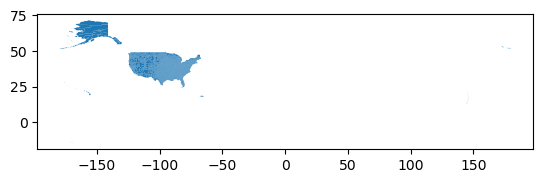

In [23]:
# d. Plot the geodataframe
counties.plot()

<!-- BEGIN QUESTION -->

f. Use the next markdown cell to explain what information you obtained from the preliminary exploration. Use complete sentences.

*Your answer here.*

The preliminary exploration of the counties Geodataframe confirmed that columns such as name are stored as strings and the geometry column has a type of 'geometry'. The `.crs` attribute revealed the Coordinate Reference System used in the GeoDataFrame is EPSG: 4269. `.plot()` method shows the extent of the GeoDataframe, which includes Alaska and Hawaii. 

<!-- END QUESTION -->

### 6.B. Cleaning

Simplify column names as needed.

In [24]:
# Check column names
counties.columns

Index(['statefp', 'countyfp', 'countyns', 'geoid', 'geoidfq', 'name',
       'namelsad', 'lsad', 'classfp', 'mtfcc', 'csafp', 'cbsafp', 'metdivfp',
       'funcstat', 'aland', 'awater', 'intptlat', 'intptlon', 'geometry'],
      dtype='object')

In [25]:
# Clean column names
counties.columns = ['state_fp', 'county_fp', 'county_ns', 'geoid', 'geoid_fq', 'name',
       'name_lsad', 'lsad', 'class_fp', 'mtfcc', 'csa_fp', 'cbsa_fp', 'met_div_fp',
       'func_stat', 'a_land', 'a_water', 'intpt_lat', 'intpt_lon', 'geometry']
counties.head(1)


,state_fp,county_fp,county_ns,geoid,geoid_fq,name,name_lsad,lsad,class_fp,mtfcc,csa_fp,cbsa_fp,met_div_fp,func_stat,a_land,a_water,intpt_lat,intpt_lon,geometry
0,31,039,00835841,31039,0500000US31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477563029,10772508,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."


### 6.C. Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them.

<Axes: >

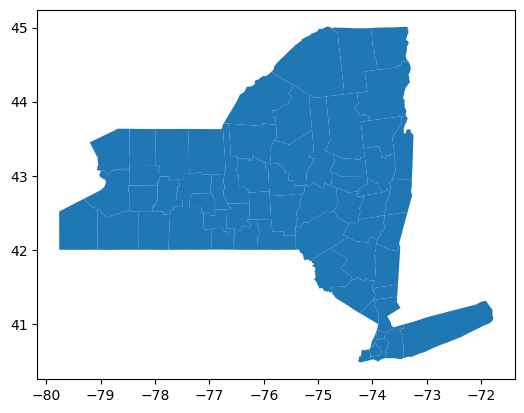

In [26]:
# Select counties in New York state by its state_fp
ny_counties = counties[counties['state_fp'] == '36']
# Plot the shapefile
ny_counties.plot()

## 7 Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### 7.A. Explore data

In the next cells:

a. Print the names of counties in `ny_counties`, without repetition.

b. Print the names of counties in `spills_per_county`, without repetition. Examine the differences in the outputs.


In [27]:
# a. Print the names of counties in geoDataFrame
sorted(ny_counties.name.unique().tolist())

['Albany',
 'Allegany',
 'Bronx',
 'Broome',
 'Cattaraugus',
 'Cayuga',
 'Chautauqua',
 'Chemung',
 'Chenango',
 'Clinton',
 'Columbia',
 'Cortland',
 'Delaware',
 'Dutchess',
 'Erie',
 'Essex',
 'Franklin',
 'Fulton',
 'Genesee',
 'Greene',
 'Hamilton',
 'Herkimer',
 'Jefferson',
 'Kings',
 'Lewis',
 'Livingston',
 'Madison',
 'Monroe',
 'Montgomery',
 'Nassau',
 'New York',
 'Niagara',
 'Oneida',
 'Onondaga',
 'Ontario',
 'Orange',
 'Orleans',
 'Oswego',
 'Otsego',
 'Putnam',
 'Queens',
 'Rensselaer',
 'Richmond',
 'Rockland',
 'Saratoga',
 'Schenectady',
 'Schoharie',
 'Schuyler',
 'Seneca',
 'St. Lawrence',
 'Steuben',
 'Suffolk',
 'Sullivan',
 'Tioga',
 'Tompkins',
 'Ulster',
 'Warren',
 'Washington',
 'Wayne',
 'Westchester',
 'Wyoming',
 'Yates']

In [28]:
# b. Print the names of counties in CSV
sorted(spills_per_county.county.unique().tolist())

['Albany',
 'Allegany',
 'Bronx',
 'Broome',
 'Cattaraugus',
 'Cayuga',
 'Chautauqua',
 'Chemung',
 'Chenango',
 'Clinton',
 'Columbia',
 'Cortland',
 'Delaware',
 'Dutchess',
 'Erie',
 'Essex',
 'Franklin',
 'Fulton',
 'Genesee',
 'Greene',
 'Hamilton',
 'Herkimer',
 'Jefferson',
 'Kings',
 'Lewis',
 'Livingston',
 'Madison',
 'Monroe',
 'Montgomery',
 'Nassau',
 'New Jersey - Region 2',
 'New York',
 'Niagara',
 'Oneida',
 'Onondaga',
 'Ontario',
 'Orange',
 'Orleans',
 'Oswego',
 'Otsego',
 'Putnam',
 'Queens',
 'Rensselaer',
 'Richmond',
 'Rockland',
 'Saratoga',
 'Schenectady',
 'Schoharie',
 'Schuyler',
 'Seneca',
 'St Lawrence',
 'Steuben',
 'Suffolk',
 'Sullivan',
 'Tioga',
 'Tompkins',
 'Tuscarora Indian Reservation',
 'Ulster',
 'Warren',
 'Washington',
 'Wayne',
 'Westchester',
 'Wyoming',
 'Yates']



c. Which are the county names that are in `spills_per_county`, but not in `ny_counties`? Your answer should be a list of strings
HINT: You can use the `numpy` function [`setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html), pay attention to the example in the documentation. Store your answer in the `diff_names` variable. 



In [29]:
# Identify county names that are different
county_csv = spills_per_county.county.unique()
county_gdf = ny_counties.name.unique()
diff_names_spills = np.setdiff1d(county_csv, county_gdf)
diff_names_spills

array(['New Jersey - Region 2', 'St Lawrence',
       'Tuscarora Indian Reservation'], dtype=object)


d. Which are the county names that are in `ny_counties`, but not in `spills_per_county`? Your answer should be a list of strings.


In [30]:
diff_names_ny = np.setdiff1d(county_gdf,county_csv)
diff_names_ny

array(['St. Lawrence'], dtype=object)




e. What is the number of spills in 'Tuscarora Indian Reservation'?


In [31]:
# e. Identify the number of spills in TIR
TIR_spills = spills_per_county[spills_per_county['county'] == 'Tuscarora Indian Reservation']['n_spills']
print(f"There is {TIR_spills.iloc[0]} spill in the Tuscarora Indian Reservation ")

There is 1 spill in the Tuscarora Indian Reservation 


### 7.B. Data updates

In the next cell, update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame and use an `assert` statement to verify that the update was successful.

You may add cells if needed.

In [32]:
# Update county name
spills_per_county.loc[spills_per_county['county'] == 'St Lawrence', 'county'] = 'St. Lawrence'

# Verify the update
assert 'St. Lawrence' in spills_per_county['county'].unique()

### 7.C. Merge

In the following cells:

a. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 

b. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.


In [33]:
# a. Delete New Jersey and TIR in spills_per_county
spills_per_county = (spills_per_county[~spills_per_county['county']
                                       .isin(['New Jersey - Region 2', 'Tuscarora Indian Reservation'])])
# Confirm two df has the same number of rows
assert len(spills_per_county) == len(ny_counties)

# Find common columns to merge
common_columns = set(spills_per_county.columns).intersection(ny_counties.columns)
if len(common_columns) != 0:
    print(f"Common columns: {common_columns}")
else:
    print("No common columns")

# Rename spills_per_county column
ny_counties = ny_counties.rename(columns={'name':'county'})
# Confirm output with correct column name
ny_counties.head(1)

No common columns


,state_fp,county_fp,county_ns,geoid,geoid_fq,county,name_lsad,lsad,class_fp,mtfcc,csa_fp,cbsa_fp,met_div_fp,func_stat,a_land,a_water,intpt_lat,intpt_lon,geometry
46,36,101,00974148,36101,0500000US36101,Steuben,Steuben County,06,H1,G4020,236,18500,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999..."


In [34]:
# b. Inner join geodf and df
ny_counties = pd.merge(ny_counties,
                      spills_per_county,
                      how = 'left',
                      on = 'county')
# Check output
ny_counties.head(1)

,state_fp,county_fp,county_ns,geoid,geoid_fq,county,name_lsad,lsad,class_fp,mtfcc,csa_fp,cbsa_fp,met_div_fp,func_stat,a_land,a_water,intpt_lat,intpt_lon,geometry,n_spills
0,36,101,00974148,36101,0500000US36101,Steuben,Steuben County,06,H1,G4020,236,18500,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",72



From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

c. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [35]:
# c. Check current spill number in Niagara
ny_counties[ny_counties['county'] == 'Niagara']

# Add one spill to Niagara county
ny_counties.loc[ny_counties['county'] == 'Niagara', 'n_spills'] += 1

In [36]:
# Verify the update
assert ny_counties[ny_counties['county'] == 'Niagara']['n_spills'].iloc[0] == 89

<!-- BEGIN QUESTION -->

## 8. Map
a. Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should be polished and have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an [annotation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) with the data source (New York State Department of Environmental Conservation) and date of access.



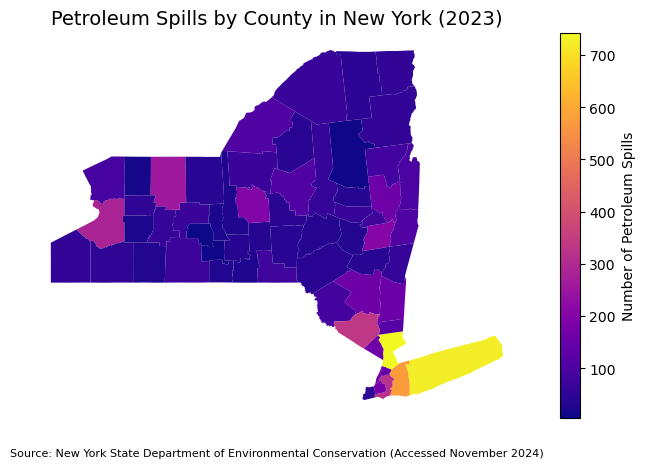

In [37]:
# a. Create a choropleth map of spills per county 
fig, ax = plt.subplots(figsize=(9,5)) # Update figure size

# Map setup 
ax.axis("off") # remove axis for a cleaner map
ax.set_title('Petroleum Spills by County in New York (2023)',
           fontsize=14)
ax.annotate('Source: New York State Department of Environmental Conservation (Accessed November 2024)',
            (0.5,-0.1),
           xycoords='axes fraction',
           ha='center',
           fontsize=8)
# Add stats to map
ny_counties.plot(ax=ax,
                 column='n_spills',
                 legend=True,
                 cmap='plasma', 
                 legend_kwds={
                     'label':'Number of Petroleum Spills',
                 })
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Write a figure description for the map, including tha names of the top 3 counties with the most petroleum spills. If you need to do additional data analysis to include relevant information from the data, you may include additional code cells here.

In [38]:
# Identify the top three counties with petroleum spills
ny_counties.sort_values(by='n_spills').tail(3)

,state_fp,county_fp,county_ns,geoid,geoid_fq,county,name_lsad,lsad,class_fp,mtfcc,csa_fp,cbsa_fp,met_div_fp,func_stat,a_land,a_water,intpt_lat,intpt_lon,geometry,n_spills
20,36,059,00974128,36059,0500000US36059,Nassau,Nassau County,06,H1,G4020,408,35620,35004,A,736960644,437290665,+40.7296118,-073.5894144,"POLYGON ((-73.78019 40.82640, -73.77498 40.830...",576
8,36,103,00974149,36103,0500000US36103,Suffolk,Suffolk County,06,H1,G4020,408,35620,35004,A,2359277313,3787417976,+40.9435540,-072.6922183,"POLYGON ((-71.80938 41.20323, -71.79115 41.184...",723
23,36,119,00974157,36119,0500000US36119,Westchester,Westchester County,06,H1,G4020,408,35620,35614,A,1115811940,179391718,+41.1526862,-073.7457526,"POLYGON ((-73.65762 40.98550, -73.65739 40.985...",743


The choropleth map shows petroleum spills across New York State counties in 2023. Based on the data from NYSDEC, counties are shaded from purple (fewer spills) to yellow (more spills). The top three counties with the most spills are Westchester County, Suffolk County, and Nassau County. 